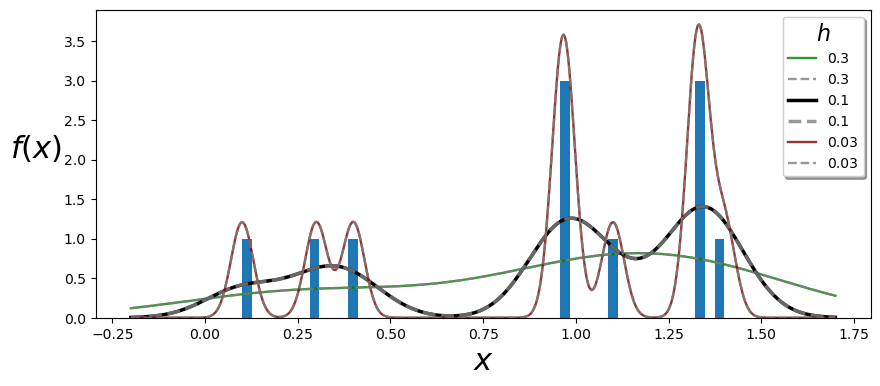

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# **THE SETUP:**

# The kernel function
def K(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# Dummy dataset
dataset = np.array([1.33,1.33,1.33,0.3,0.97,0.97,0.96,1.1,0.1,1.4,0.4])

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min()-0.3,dataset.max()+0.3,num=600)

# Bandwith values for experimentation
H = [0.3,0.1,0.03]
n_samples = dataset.size

# Line properties for different bandwith values
color_list = ['green','black','maroon']
alpha_list = [0.8,1,0.8]
width_list = [1.7,2.5,1.7]

#------------------------------------------------------------------------------

# **CALCULATION AND PLOTTING:**

if not os.path.exists("./Plots"):
    os.makedirs("./Plots")

plt.figure(figsize=(10,4))

# Iterate over bandwith values
for h, color, alpha, width in zip(H,color_list,alpha_list,width_list):
    
    # **METHOD DONE MANUALLY:**
    
    total_sum = 0
    # Iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += K((x_range-xi)/h)
        
    # Normalization
    y_range = total_sum/(h*n_samples)
    
    # Plotting
    plt.plot(x_range, y_range, 
        color=color,alpha=alpha,linewidth=width,label=f"{h}")
    
    #--------------------------------------------------------------------------
    
    # **BUILT-IN METHOD:**
    
    kde = KernelDensity(
        kernel='gaussian',bandwidth=h).fit(dataset[:,np.newaxis])
    
    log_density = kde.score_samples(x_range[:,np.newaxis])
    
    # Plotting
    plt.plot(x_range,np.exp(log_density),
        color='grey',alpha=0.8,linewidth=width,linestyle='--',label=f"{h}")
    
    #--------------------------------------------------------------------------
    
plt.hist(dataset,bins=50)
plt.xlabel("$x$",fontsize=22)
plt.ylabel("$f(x)$",fontsize=22,rotation="horizontal",labelpad=20)
plt.legend(fontsize=10,shadow=True,title="$h$",title_fontsize=16)
plt.savefig("./Plots/kde.jpg")